# Data Exploration

Simple manipulation with finger matrix sensors worn by human.

Sensors: 2A, 2B with cutout slits. 2B with one line (probs middle row B?) destroyed in the process.

Arduino code: matrix_readout.ino

#### // Settings

uint8_t delay1 = 1;

uint8_t delay2 = 1; 

uint8_t delay3 = 0;

static const uint16_t MAX_READS = 1000;

In [2]:
# Library imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys  
sys.path.insert(0, '/home/zotac5/dev/hand_v11/src/festo_phand/festo_pressure_sensors/sensor_evaluation')

%load_ext autoreload
%autoreload 2

## Import of plotting functions
Plotting functions are saved in a separate python file for notebook readibility

In [3]:
# Dirty way to import all functions in Jupyter
from src.sensor_evaluation.plot_functions import *
from src.sensor_evaluation.helpers import *

In [4]:
# Load data from .csv file
DATA_FOLDER = '../data/manip/'
DATA_SAMPLE = 'HEx01.csv'

df, sample_name = get_sample(DATA_SAMPLE, DATA_FOLDER, matrix_count=2)

In [25]:
col_labels = ['A1','A2','A3','B1','B2','B3','C1','C2','C3']
matrix_samples = ['2A','2B','2C','2D','2E','2F']

In [93]:
# Helper function: uploads data into dataframes
def csv_to_df(folder):
    
    df_dict = {}

    for sample in matrix_samples:
        df_dict[sample] = pd.DataFrame(columns=col_labels)

        data_files = [f for f in os.listdir(folder) if f.endswith('.csv') and f.startswith(sample)]

        for file in sorted(data_files):
            df, sample_name = get_sample(file, folder)
            df_dict[sample] = df_dict[sample].append(df, ignore_index=True)
            
            #time_plot(df_dict[sample], sample_name)
            
    return df_dict

In [163]:
def multimat_csv_to_df(folder, test_name):
    
    df_dict = {}
    
    data_files = sorted([f for f in os.listdir(DATA_FOLDER) if f.endswith('.csv') and f.startswith(test_name)])
    
    for k, sample in enumerate(matrix_samples):
        df_dict[sample] = pd.DataFrame(columns=col_labels)
        
        
    for file in data_files:
        
        df, sample_name = get_sample(file, DATA_FOLDER, matrix_count=2)
        
        for k, sample in enumerate(matrix_samples):
            try:
                df2 = df.iloc[:,k*9:(k+1)*9]
                df2.columns = col_labels
                df_dict[sample] = df_dict[sample].append(df2, ignore_index=True)
                #print(df_dict[sample].head())
                pass
            except:
                #print('no data found for '+sample)
                #print(k)
                pass   

            #print('...')
            
    return df_dict

In [62]:
# Define a dictionary of complete data labels
lbls = {}

for sample in matrix_samples:
    lbls[sample] = []
    for lbl in col_labels:
        lbls[sample].append(sample+'-'+lbl)

In [5]:
data_labels = ['A1','A2','A3','B1','B2','B3','C1','C2','C3',
              '2-A1','2-A2','2-A3','2-B1','2-B2','2-B3','2-C1','2-C2','2-C3',]

## Import of all samples into dataframes

#### Naming code:

H = worn by human, R = worn by robot, U = unworn

G = grasping, M = moving, E = empty (not grasping, not moving)

H = hard object, S = soft object, x = no object

## Unworn

### Unworn, non-manipulating: UEx

In [97]:
DATA_FOLDER = '../data'+'/unworn/'
data_UEx = csv_to_df(DATA_FOLDER) 

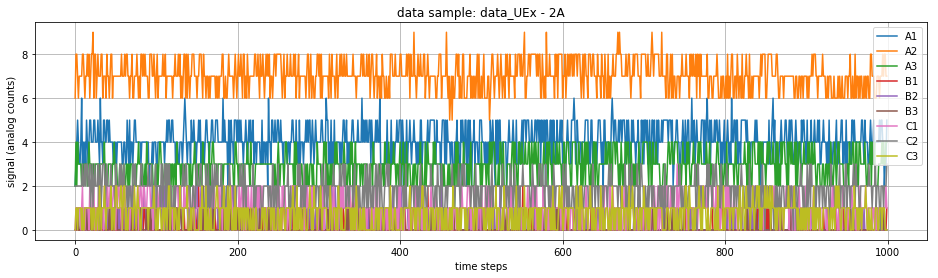

In [98]:
time_plot(data_UEx['2A'], 'data_UEx - 2A')

### Unworn, hard touch: UGH

In [99]:
DATA_FOLDER = '../data'+'/pts_2kg/'
data_UGH = csv_to_df(DATA_FOLDER) 

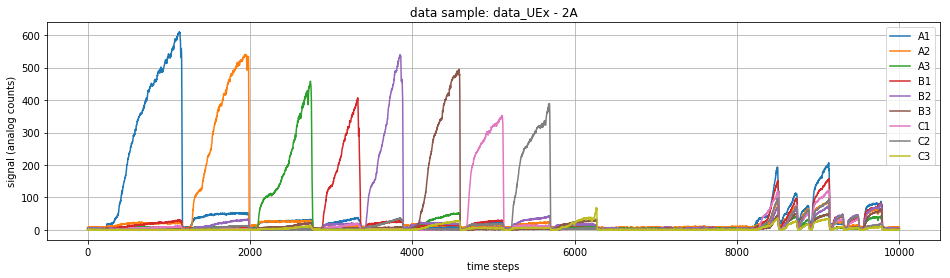

In [100]:
time_plot(data_UGH['2A'], 'data_UEx - 2A')

### Unworn, combined

In [101]:
data_unworn = {}

for sample in matrix_samples:
    data_unworn[sample] = pd.DataFrame(columns=col_labels)
    data_unworn[sample] = data_unworn[sample].append(data_UEx[sample], ignore_index=True)
    data_unworn[sample] = data_unworn[sample].append(data_UGH[sample], ignore_index=True)
    

## Worn by robot

### Worn by robot, non-manipulating: REx
Data that could be used as baseline for more robot-worn data

In [96]:
DATA_FOLDER = '../data'+'/worn_robot/'
data_REx = csv_to_df(DATA_FOLDER)

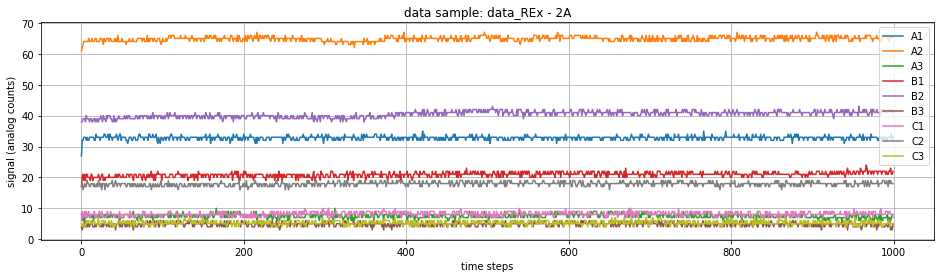

In [95]:
time_plot(data_REx['2A'], 'data_REx - 2A')

## Worn by human

Worn by human, empty hand, not moving

In [174]:
# samples unworn, not manipulating or moving
data_HEx = {}
test_name = 'HEx'  

DATA_FOLDER = '../data'+'/manip/'
data_files = sorted([f for f in os.listdir(DATA_FOLDER) if f.endswith('.csv') and f.startswith(test_name)])

data_HEx = multimat_csv_to_df(DATA_FOLDER, test_name)

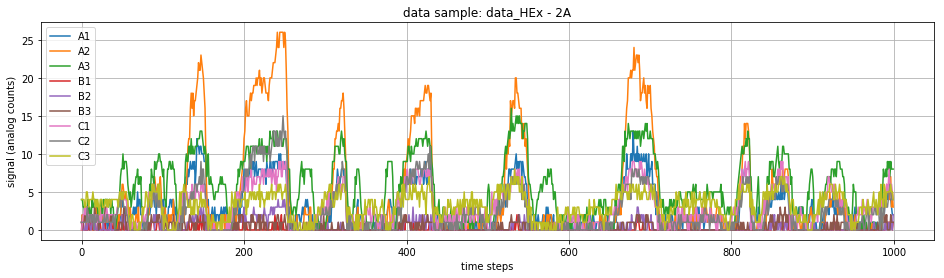

In [175]:
time_plot(data_HEx['2A'], 'data_HEx - 2A')

Worn by human, manipulating hard object.

In [181]:
# samples unworn, not manipulating or moving
data_HGH = {}
test_name = 'HGH'  
DATA_FOLDER = '../data'+'/manip/'

data_HGH = multimat_csv_to_df(DATA_FOLDER, test_name)

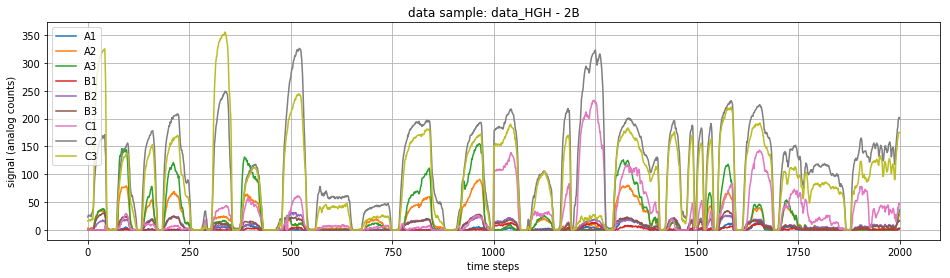

In [182]:
time_plot(data_HGH['2B'], 'data_HGH - 2B')

Worn by human, manipulating soft object

In [179]:
# samples unworn, not manipulating or moving
data_HGS = {}
test_name = 'HGS'  
DATA_FOLDER = '../data'+'/manip/'

data_HGS = multimat_csv_to_df(DATA_FOLDER, test_name)

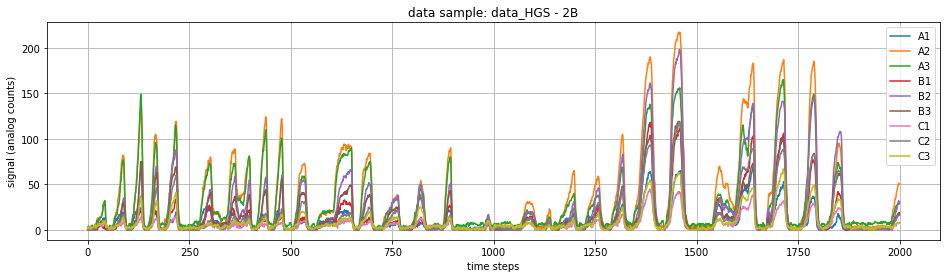

In [180]:
time_plot(data_HGS['2A'], 'data_HGS - 2B')